# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Goal of the notebook

This notebook is used to predict the market data over 10 months and perform some feature selction in order to build a proper model.
- we used a grid search in order to find the best parameter per feature minimising RMSE
- we etract does preidction on a csv calles Market_data_predicted to be called on the model 

**Table of Contents** <br>
* [1. Initial Setup and DataLoading](#setup)
* [2. Market Data Predictions](mdp)
   * [2.1. Grid Search](#grid)
* [3. Export](#export)   

<hr>
<a class="anchor" id="setup">

 ## 1. Initial Setup and Data Loading
 </a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error



# importing relevant 
from Market_data_prediction_Functions import *

import importlib
imported_module = importlib.import_module("Market_data_prediction_Functions")
importlib.reload(imported_module)


<module 'Market_data_prediction_Functions' from '/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Market_data_prediction_Functions.py'>

In [2]:
df_market = pd.read_csv('../Data/df_market.csv')
info_market = pd.read_csv('../Data/info_market.csv')
filtered_market = pd.read_csv('../Data/filtered_info_market.csv')

In [3]:
# extract a list of index codes that were find relevant in the preevious notebook
index_codes = filtered_market["Index Code"].tolist()
# only select the columns that were find relevant
df_market = df_market[["date"]+ index_codes]
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                219 non-null    object 
 1   MAB_ELE_PRO156      219 non-null    float64
 2   MAB_ELE_SHP156      219 non-null    float64
 3   MAB_ELE_SHP250      219 non-null    float64
 4   MAB_ELE_PRO392      219 non-null    float64
 5   MAB_ELE_SHP392      219 non-null    float64
 6   MAB_ELE_PRO756      219 non-null    float64
 7   MAB_ELE_SHP756      219 non-null    float64
 8   MAB_ELE_PRO826      219 non-null    float64
 9   MAB_ELE_SHP826      219 non-null    float64
 10  MAB_ELE_SHP840      219 non-null    float64
 11  RohiMETMIN1000_org  219 non-null    float64
 12  RohCOPPER1000_org   219 non-null    float64
 13  WKLWEUR840_org      219 non-null    float64
 14  PRI27840_org        219 non-null    float64
 15  PRI27380_org        219 non-null    float64
 16  PRI27250

In [4]:
df_market.isna().sum()

date                  0
MAB_ELE_PRO156        0
MAB_ELE_SHP156        0
MAB_ELE_SHP250        0
MAB_ELE_PRO392        0
MAB_ELE_SHP392        0
MAB_ELE_PRO756        0
MAB_ELE_SHP756        0
MAB_ELE_PRO826        0
MAB_ELE_SHP826        0
MAB_ELE_SHP840        0
RohiMETMIN1000_org    0
RohCOPPER1000_org     0
WKLWEUR840_org        0
PRI27840_org          0
PRI27380_org          0
PRI27250_org          0
PRI27276_org          0
PRO28756_org          0
PRO28392_org          0
PRO271000_org         0
PRO27756_org          0
PRO27826_org          0
PRO27392_org          0
PRO27276_org          0
dtype: int64

<hr>
<a class="anchor" id="mdp">

 ## 2. Market Data Predictions
 </a>

<hr>
<a class="anchor" id="grid">

 ## 2.1. Grid Search
 </a>


In [5]:
# Run the grid search on all features in your market_df (which should already be defined)
grid_search_results = grid_search_all_features(df_market, date_column='date', forecast_horizon=10)

# Optionally, print out the complete grid search results for further analysis
print("\nComplete Grid Search Results:")
for feature, result in grid_search_results.items():
    print(f"\nFeature: {feature}")
    print(result)


22:49:37 - cmdstanpy - INFO - Chain [1] start processing
22:49:37 - cmdstanpy - INFO - Chain [1] done processing
22:49:37 - cmdstanpy - INFO - Chain [1] start processing
22:49:37 - cmdstanpy - INFO - Chain [1] done processing
22:49:37 - cmdstanpy - INFO - Chain [1] start processing
22:49:37 - cmdstanpy - INFO - Chain [1] done processing
22:49:37 - cmdstanpy - INFO - Chain [1] start processing
22:49:37 - cmdstanpy - INFO - Chain [1] done processing
22:49:37 - cmdstanpy - INFO - Chain [1] start processing
22:49:37 - cmdstanpy - INFO - Chain [1] done processing
22:49:37 - cmdstanpy - INFO - Chain [1] start processing
22:49:37 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:38 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:38 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:38 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO156 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0} | RMSE: 12.5164


22:49:38 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:38 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:38 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:38 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:38 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP156 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0} | RMSE: 12.5164


22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] start processing
22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] start processing
22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP250 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 9.9337


22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] start processing
22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] start processing
22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] start processing
22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] start processing
22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] start processing
22:49:41 - cmdstanpy - INFO - Chain [1] done processing
22:49:41 - cmdstanpy - INFO - Chain [1] start processing
22:49:41 - cmdstanpy - INFO - Chain [1] done processing
22:49:41 - cmdstanpy - INFO - Chain [1] start processing
22:49:41 - cmdstanpy - INFO - Chain [1] done processing
22:49:41 - cmdstanpy - INFO - Chain [1] start processing
22:49:41 - cmdstanpy - INFO - Chain [1] done processing
22:49:41 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_PRO392 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 14.9471


22:49:41 - cmdstanpy - INFO - Chain [1] start processing
22:49:41 - cmdstanpy - INFO - Chain [1] done processing
22:49:41 - cmdstanpy - INFO - Chain [1] start processing
22:49:41 - cmdstanpy - INFO - Chain [1] done processing
22:49:41 - cmdstanpy - INFO - Chain [1] start processing
22:49:41 - cmdstanpy - INFO - Chain [1] done processing
22:49:42 - cmdstanpy - INFO - Chain [1] start processing
22:49:42 - cmdstanpy - INFO - Chain [1] done processing
22:49:42 - cmdstanpy - INFO - Chain [1] start processing
22:49:42 - cmdstanpy - INFO - Chain [1] done processing
22:49:42 - cmdstanpy - INFO - Chain [1] start processing
22:49:42 - cmdstanpy - INFO - Chain [1] done processing
22:49:42 - cmdstanpy - INFO - Chain [1] start processing
22:49:42 - cmdstanpy - INFO - Chain [1] done processing
22:49:42 - cmdstanpy - INFO - Chain [1] start processing
22:49:42 - cmdstanpy - INFO - Chain [1] done processing
22:49:42 - cmdstanpy - INFO - Chain [1] start processing
22:49:42 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_SHP392 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 14.9510


22:49:42 - cmdstanpy - INFO - Chain [1] start processing
22:49:42 - cmdstanpy - INFO - Chain [1] done processing
22:49:42 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1] done processing
22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1] done processing
22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1] done processing
22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1] done processing
22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1] done processing
22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1] done processing
22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1] done processing
22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO756 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 8.0152


22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_SHP756 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 7.9478


22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO826 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 5.9753


22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_SHP826 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 7.8705


22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP840 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 8.0707


22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] start processing
22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] start processing
22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] start processing
22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] start processing
22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] start processing
22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] start processing
22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] 

Feature: RohiMETMIN1000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5} | RMSE: 27.4670


22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:50 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:50 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] 

Feature: RohCOPPER1000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5} | RMSE: 27.5758


22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:50 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:50 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:50 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:50 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:50 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1] done processing
22:49:51 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1] done processing
22:49:51 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1] done processing
22:49:51 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1]

Feature: WKLWEUR840_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 5.0} | RMSE: 0.0350


22:49:51 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1] done processing
22:49:51 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1] done processing
22:49:51 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1] done processing
22:49:51 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1] done processing
22:49:51 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1] done processing
22:49:52 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1] done processing
22:49:52 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1] done processing
22:49:52 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1] done processing
22:49:52 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1]

Feature: PRI27840_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 13.1037


22:49:52 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1] done processing
22:49:52 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1] done processing
22:49:52 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1] done processing
22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:53 - cmdstanpy - INFO - Chain [1] done processing
22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:53 - cmdstanpy - INFO - Chain [1] done processing
22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:53 - cmdstanpy - INFO - Chain [1] done processing
22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:53 - cmdstanpy - INFO - Chain [1] done processing
22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:53 - cmdstanpy - INFO - Chain [1] done processing
22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:53 - cmdstanpy - INFO - Chain [1]

Feature: PRI27380_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 7.7346


22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:53 - cmdstanpy - INFO - Chain [1] done processing
22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1]

Feature: PRI27250_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0} | RMSE: 2.1005


22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1]

Feature: PRI27276_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 4.5704


22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1] done processing
22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1] done processing
22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1] done processing
22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1] done processing
22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1] done processing
22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1] done processing
22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1] done processing
22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1]

Feature: PRO28756_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 10.0930


22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1]

Feature: PRO28392_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 19.2535


22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1]

Feature: PRO271000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 5.1383


22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1]

Feature: PRO27756_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 4.3838


22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:00 - cmdstanpy - INFO - Chain [1] done processing
22:50:01 - cmdstanpy - INFO - Chain [1] 

Feature: PRO27826_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 5.9730


22:50:01 - cmdstanpy - INFO - Chain [1] done processing
22:50:01 - cmdstanpy - INFO - Chain [1] start processing
22:50:01 - cmdstanpy - INFO - Chain [1] done processing
22:50:01 - cmdstanpy - INFO - Chain [1] start processing
22:50:01 - cmdstanpy - INFO - Chain [1] done processing
22:50:01 - cmdstanpy - INFO - Chain [1] start processing
22:50:01 - cmdstanpy - INFO - Chain [1] done processing
22:50:01 - cmdstanpy - INFO - Chain [1] start processing
22:50:01 - cmdstanpy - INFO - Chain [1] done processing
22:50:01 - cmdstanpy - INFO - Chain [1] start processing
22:50:01 - cmdstanpy - INFO - Chain [1] done processing
22:50:01 - cmdstanpy - INFO - Chain [1] start processing
22:50:01 - cmdstanpy - INFO - Chain [1] done processing
22:50:01 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] 

Feature: PRO27392_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 6.3997


22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:03 - cmdstanpy - INFO - Chain [1] start processing
22:50:03 - cmdstanpy - INFO - Chain [1] done processing


Feature: PRO27276_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 8.9131

Complete Grid Search Results:

Feature: MAB_ELE_PRO156
{'best_params': {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0}, 'best_rmse': np.float64(12.516422305129543), 'param_results': [{'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2, 'rmse': np.float64(12.766008780036382)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5, 'rmse': np.float64(12.801445721975039)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'rmse': np.float64(12.790778460610085)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 2.0, 'rmse': np.float64(12.702961178636663)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0, 'rmse': np.float64(12.516422305129543)}, {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2, 'rmse': np.float64(15.858846272141713)}, {'se

## final prediction

In this section we compare two models 
- the first one incoorporate feature with the date of covid and the start of the ukraine war (we assume that if the event didn't end before the end of the prediction data the event is still occuring now)
- the second model don't use any external features

22:50:03 - cmdstanpy - INFO - Chain [1] start processing
22:50:03 - cmdstanpy - INFO - Chain [1] done processing


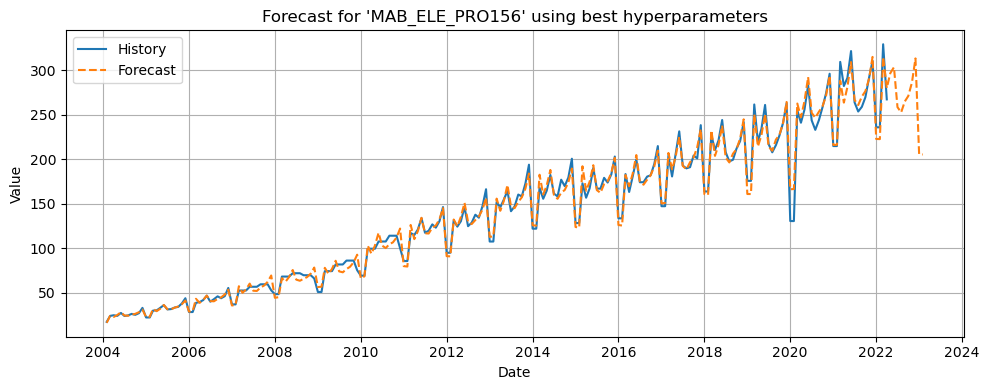

22:50:03 - cmdstanpy - INFO - Chain [1] start processing
22:50:03 - cmdstanpy - INFO - Chain [1] done processing


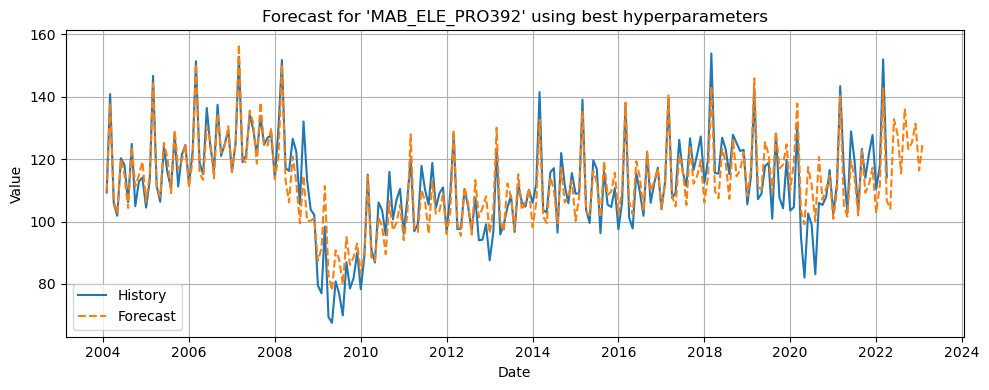

22:50:03 - cmdstanpy - INFO - Chain [1] start processing
22:50:03 - cmdstanpy - INFO - Chain [1] done processing


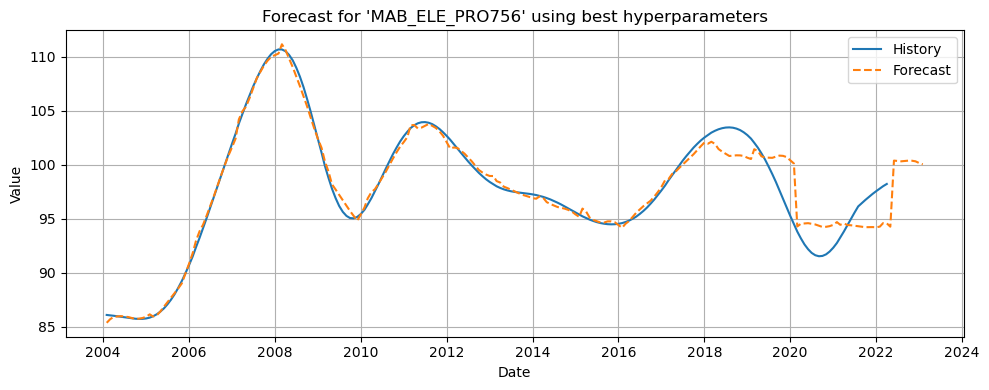

22:50:03 - cmdstanpy - INFO - Chain [1] start processing
22:50:03 - cmdstanpy - INFO - Chain [1] done processing


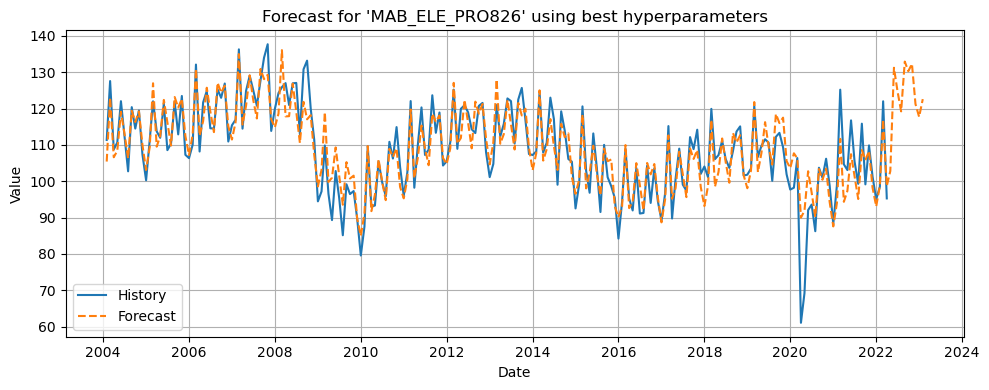

22:50:04 - cmdstanpy - INFO - Chain [1] start processing
22:50:04 - cmdstanpy - INFO - Chain [1] done processing


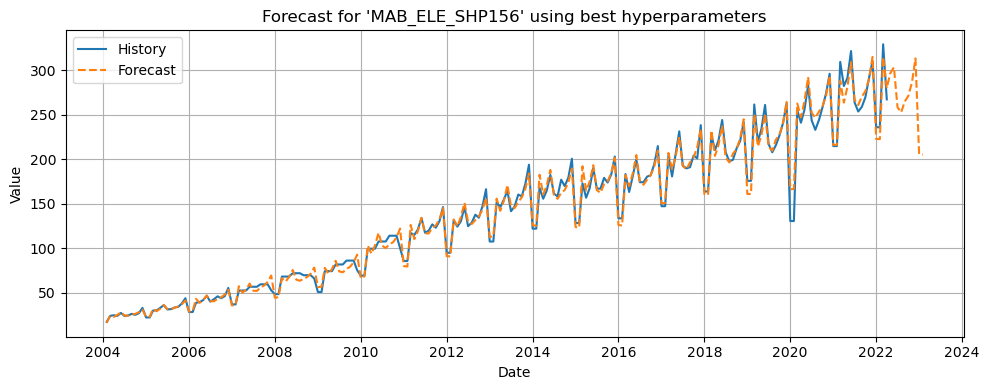

22:50:04 - cmdstanpy - INFO - Chain [1] start processing
22:50:04 - cmdstanpy - INFO - Chain [1] done processing


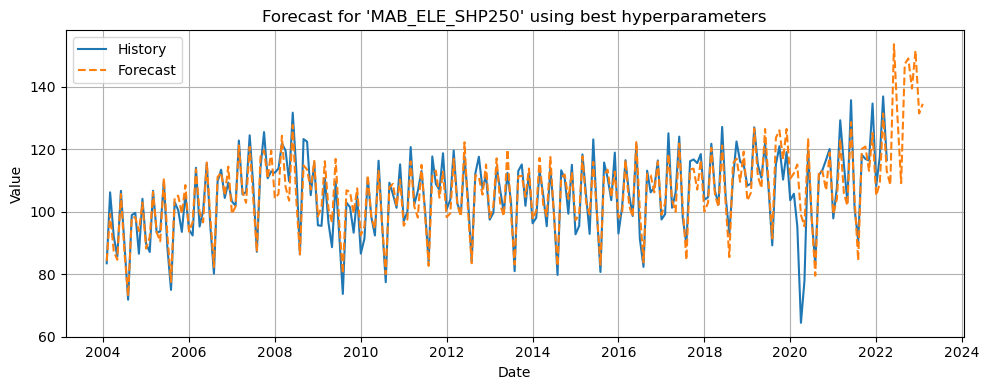

22:50:04 - cmdstanpy - INFO - Chain [1] start processing
22:50:04 - cmdstanpy - INFO - Chain [1] done processing


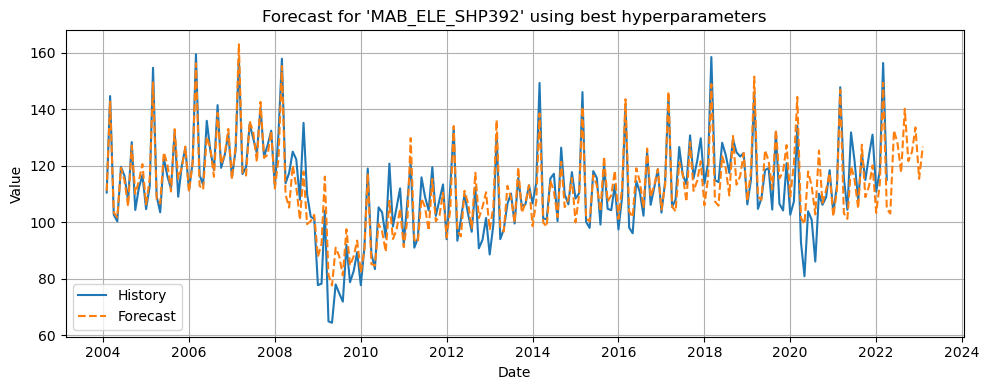

22:50:04 - cmdstanpy - INFO - Chain [1] start processing
22:50:04 - cmdstanpy - INFO - Chain [1] done processing


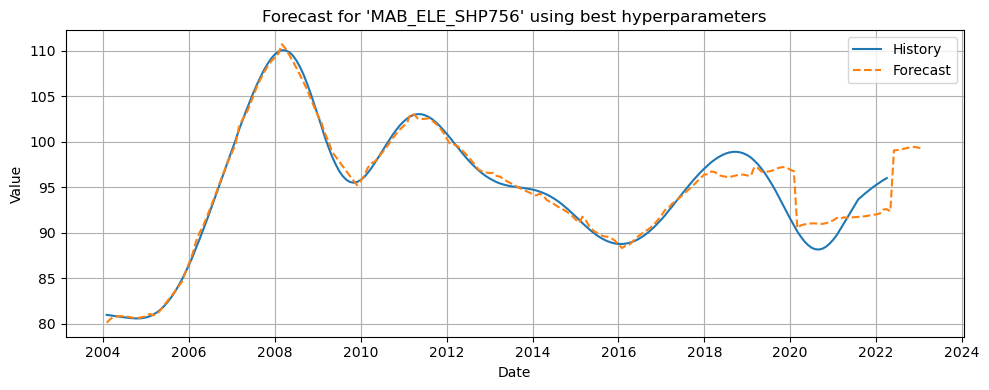

22:50:04 - cmdstanpy - INFO - Chain [1] start processing
22:50:04 - cmdstanpy - INFO - Chain [1] done processing


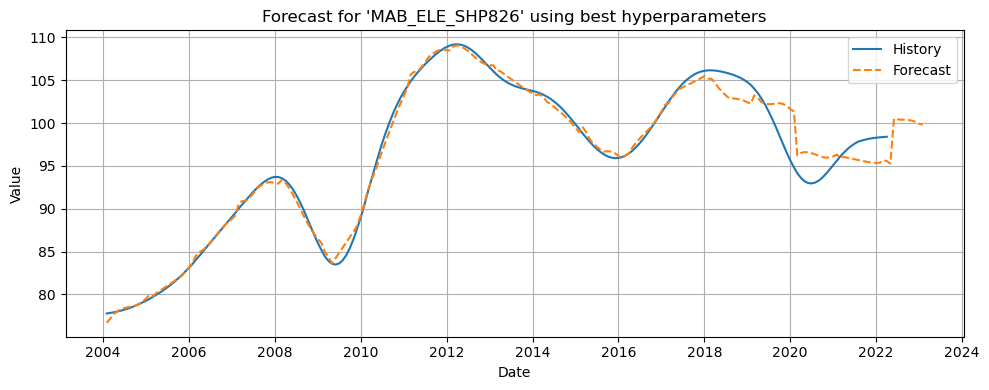

22:50:05 - cmdstanpy - INFO - Chain [1] start processing
22:50:05 - cmdstanpy - INFO - Chain [1] done processing


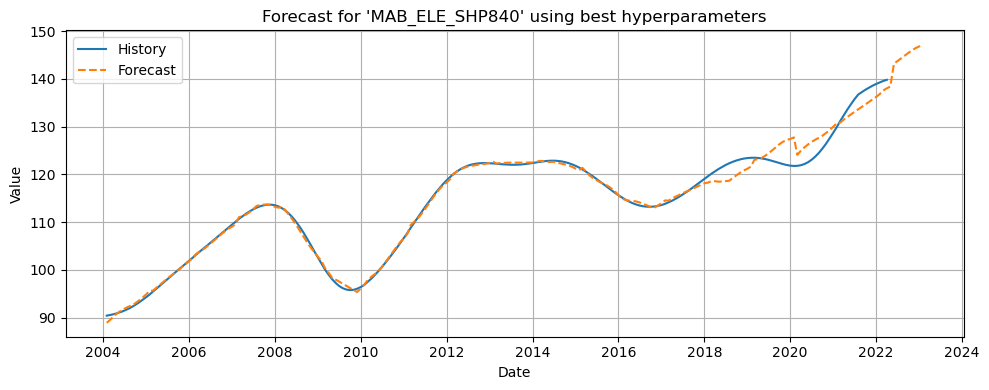

22:50:05 - cmdstanpy - INFO - Chain [1] start processing
22:50:05 - cmdstanpy - INFO - Chain [1] done processing


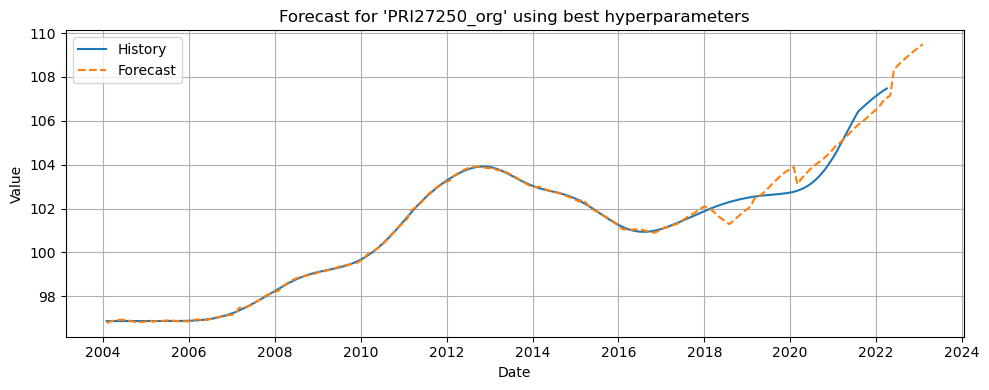

22:50:05 - cmdstanpy - INFO - Chain [1] start processing
22:50:05 - cmdstanpy - INFO - Chain [1] done processing


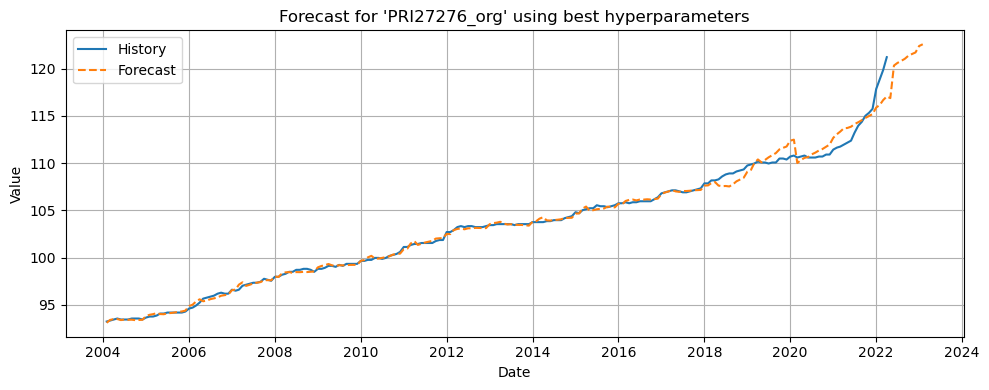

22:50:05 - cmdstanpy - INFO - Chain [1] start processing
22:50:05 - cmdstanpy - INFO - Chain [1] done processing


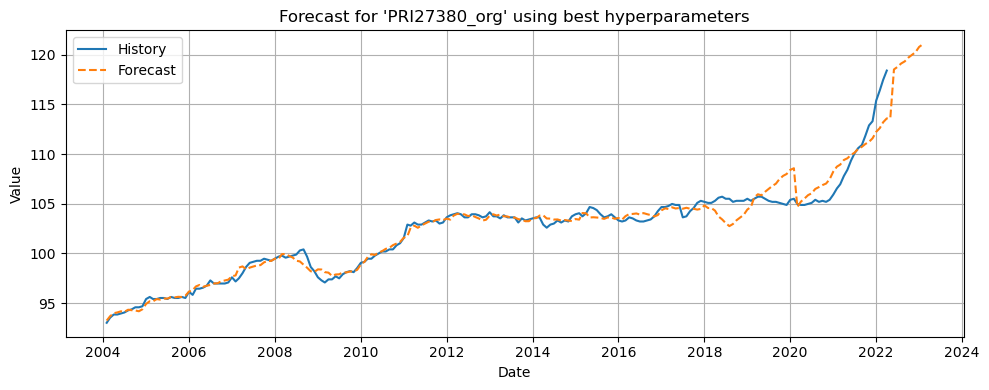

22:50:05 - cmdstanpy - INFO - Chain [1] start processing
22:50:05 - cmdstanpy - INFO - Chain [1] done processing


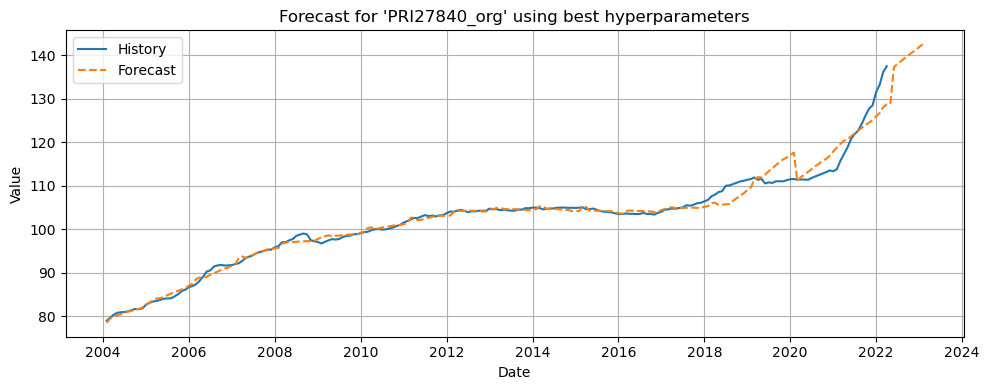

22:50:06 - cmdstanpy - INFO - Chain [1] start processing
22:50:06 - cmdstanpy - INFO - Chain [1] done processing


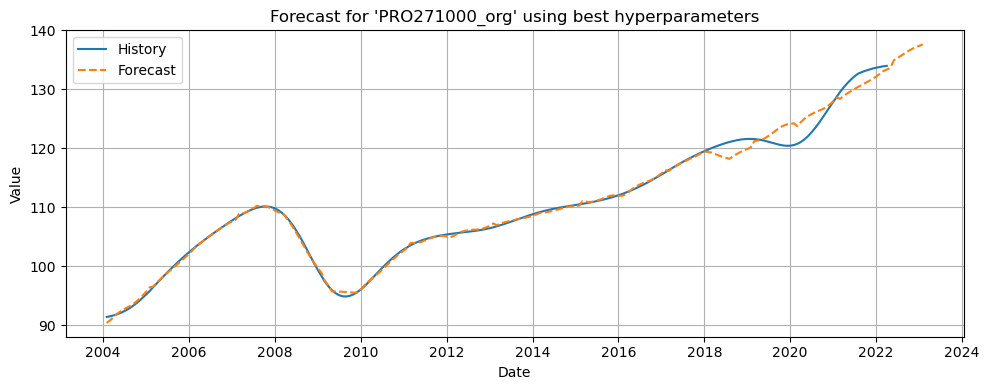

22:50:06 - cmdstanpy - INFO - Chain [1] start processing
22:50:06 - cmdstanpy - INFO - Chain [1] done processing


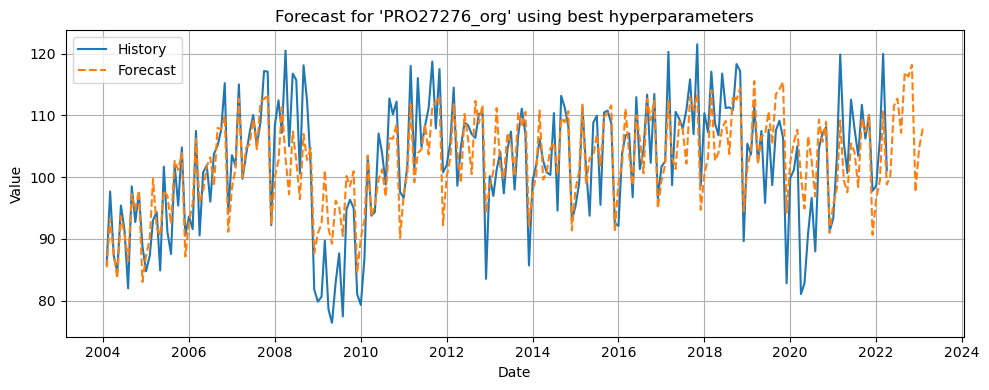

22:50:06 - cmdstanpy - INFO - Chain [1] start processing
22:50:06 - cmdstanpy - INFO - Chain [1] done processing


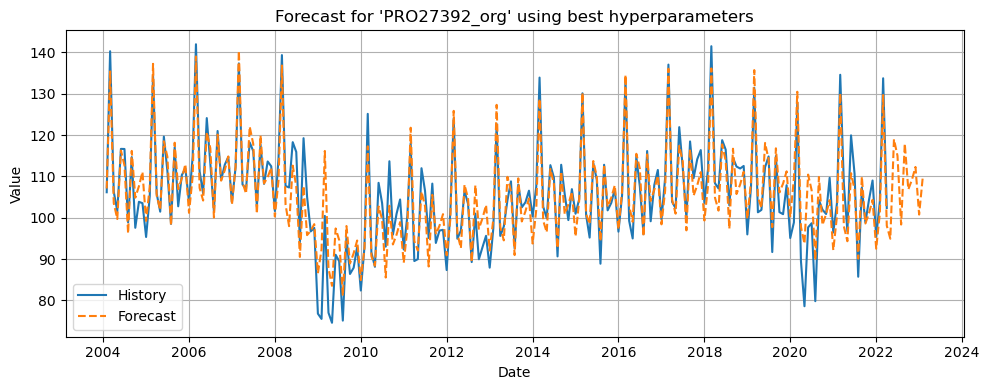

22:50:06 - cmdstanpy - INFO - Chain [1] start processing
22:50:06 - cmdstanpy - INFO - Chain [1] done processing


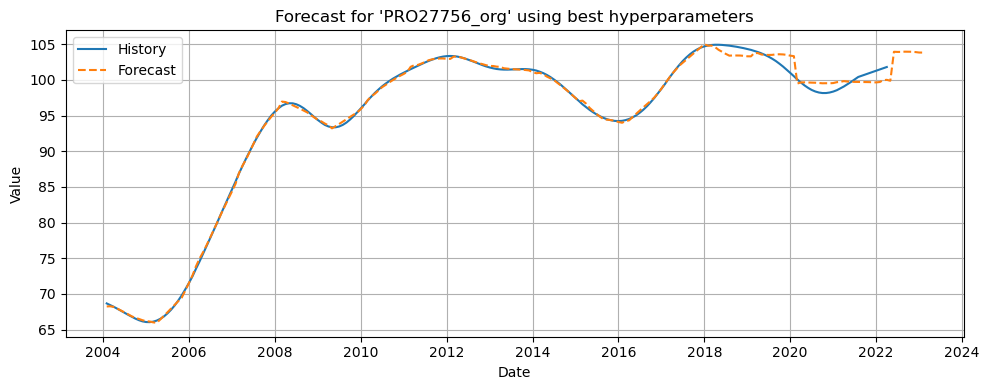

22:50:06 - cmdstanpy - INFO - Chain [1] start processing
22:50:06 - cmdstanpy - INFO - Chain [1] done processing


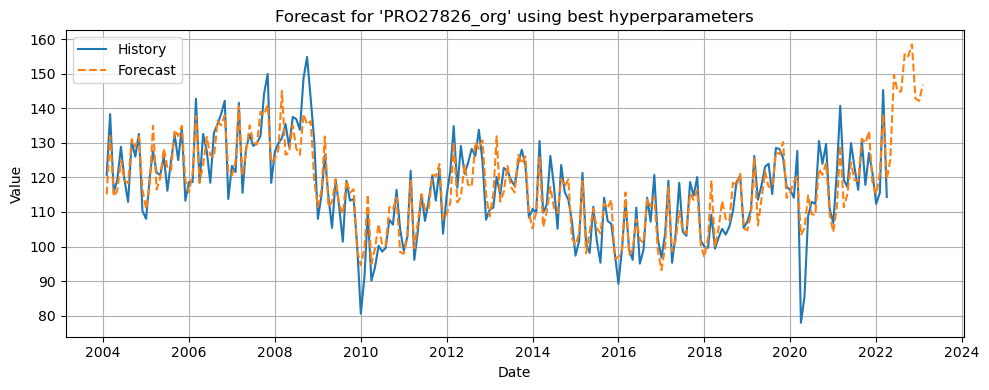

22:50:07 - cmdstanpy - INFO - Chain [1] start processing
22:50:07 - cmdstanpy - INFO - Chain [1] done processing


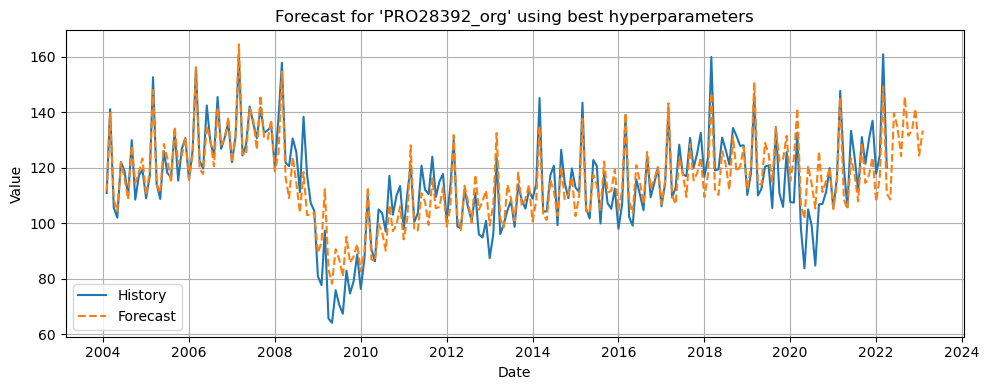

22:50:07 - cmdstanpy - INFO - Chain [1] start processing
22:50:07 - cmdstanpy - INFO - Chain [1] done processing


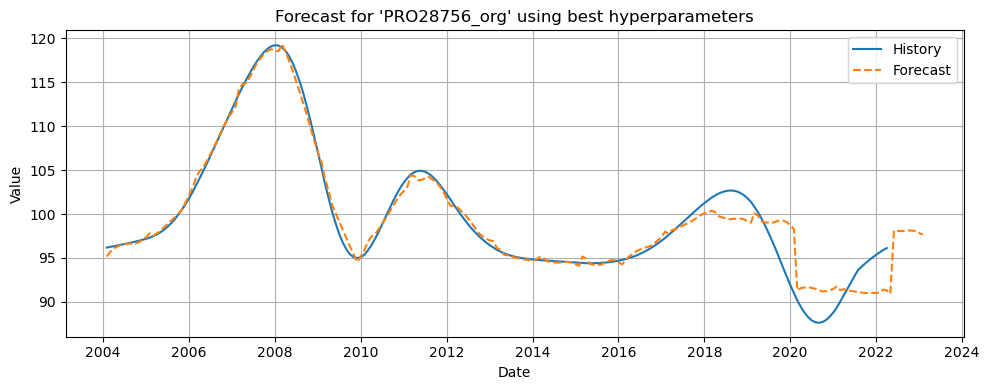

22:50:07 - cmdstanpy - INFO - Chain [1] start processing
22:50:07 - cmdstanpy - INFO - Chain [1] done processing


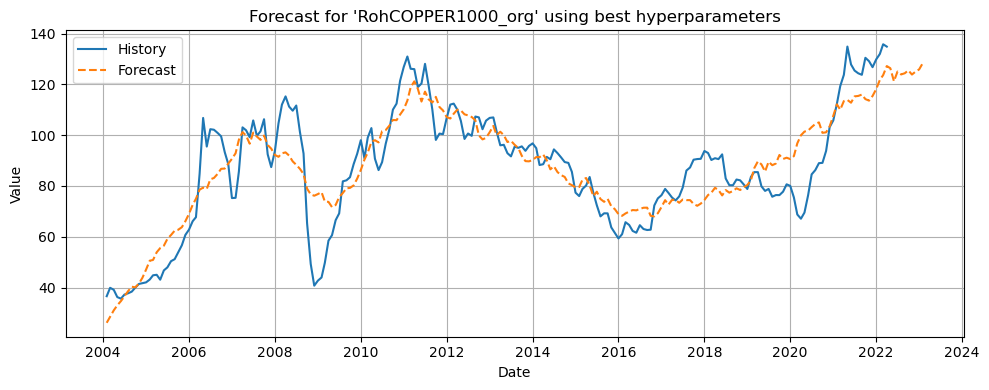

22:50:07 - cmdstanpy - INFO - Chain [1] start processing
22:50:07 - cmdstanpy - INFO - Chain [1] done processing


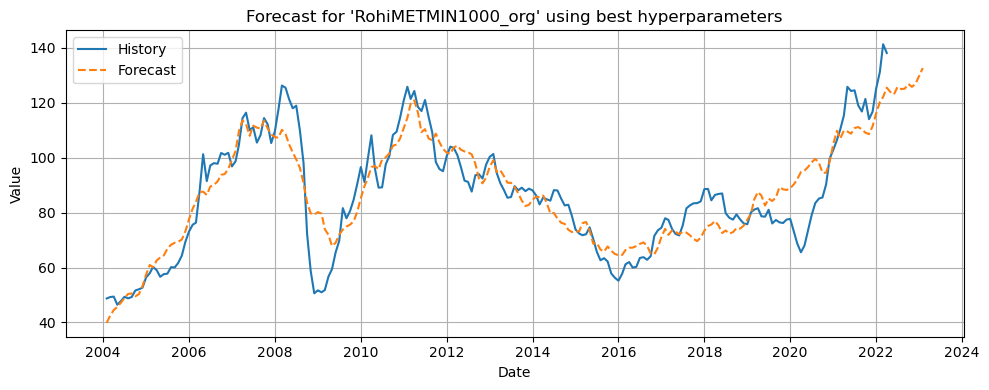

22:50:07 - cmdstanpy - INFO - Chain [1] start processing
22:50:07 - cmdstanpy - INFO - Chain [1] done processing


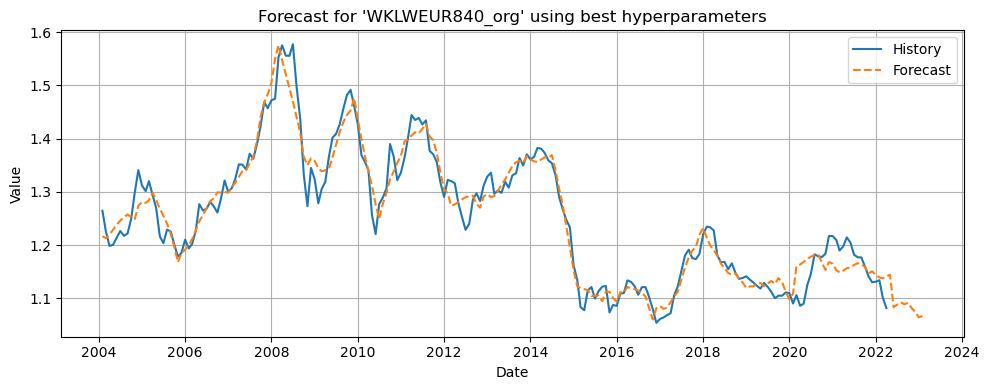

In [6]:
forecasts_with_covide_ukraine = specific_single_forecast_market_features_prophet_with_covid_and_ukraine(
    df_market, 
    best_params_dict=grid_search_results, 
    date_column='date', 
    forecast_horizon=10, 
    plot=True
)

22:50:08 - cmdstanpy - INFO - Chain [1] start processing
22:50:08 - cmdstanpy - INFO - Chain [1] done processing


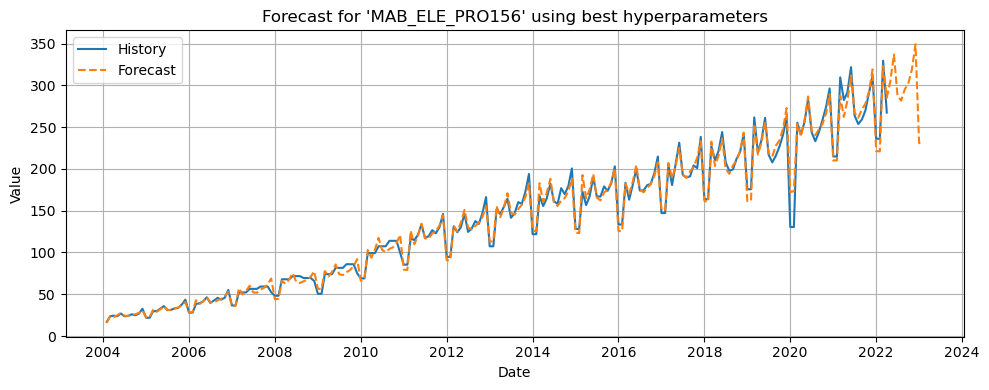

22:50:08 - cmdstanpy - INFO - Chain [1] start processing
22:50:08 - cmdstanpy - INFO - Chain [1] done processing


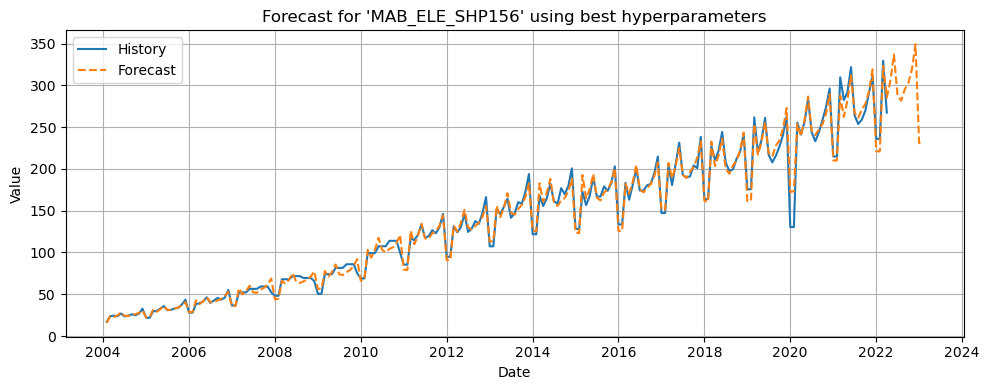

22:50:08 - cmdstanpy - INFO - Chain [1] start processing
22:50:08 - cmdstanpy - INFO - Chain [1] done processing


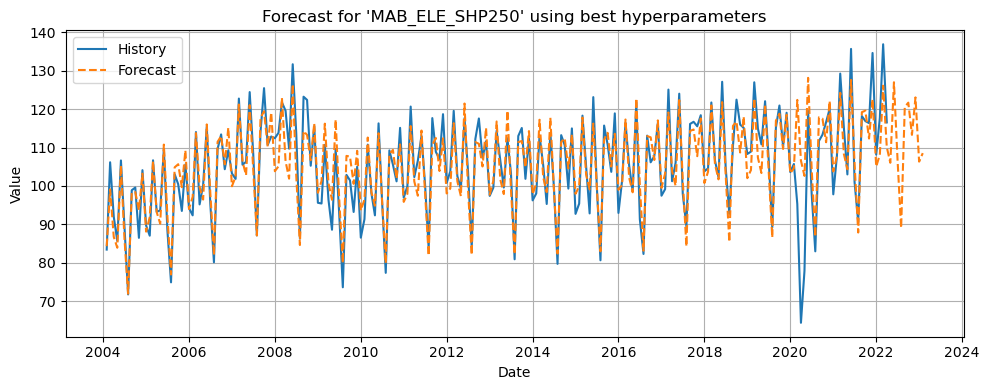

22:50:08 - cmdstanpy - INFO - Chain [1] start processing
22:50:08 - cmdstanpy - INFO - Chain [1] done processing


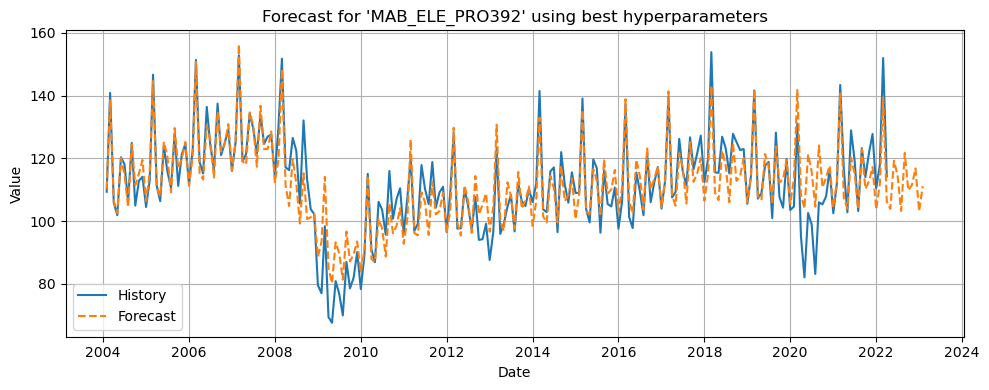

22:50:08 - cmdstanpy - INFO - Chain [1] start processing
22:50:08 - cmdstanpy - INFO - Chain [1] done processing


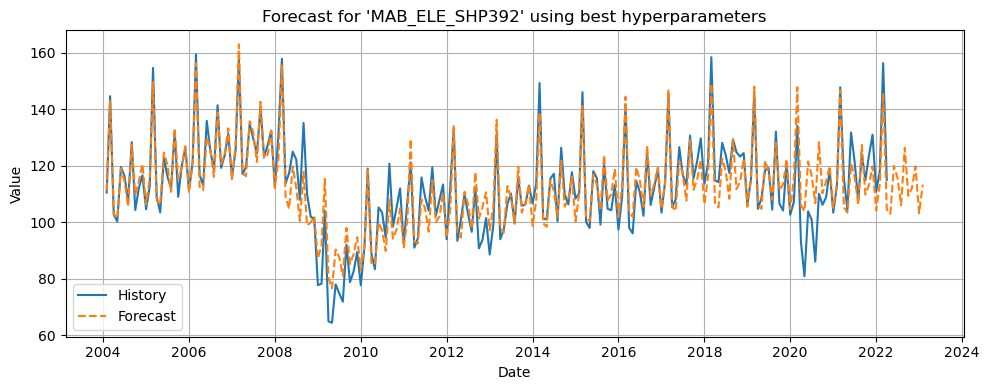

22:50:09 - cmdstanpy - INFO - Chain [1] start processing
22:50:09 - cmdstanpy - INFO - Chain [1] done processing


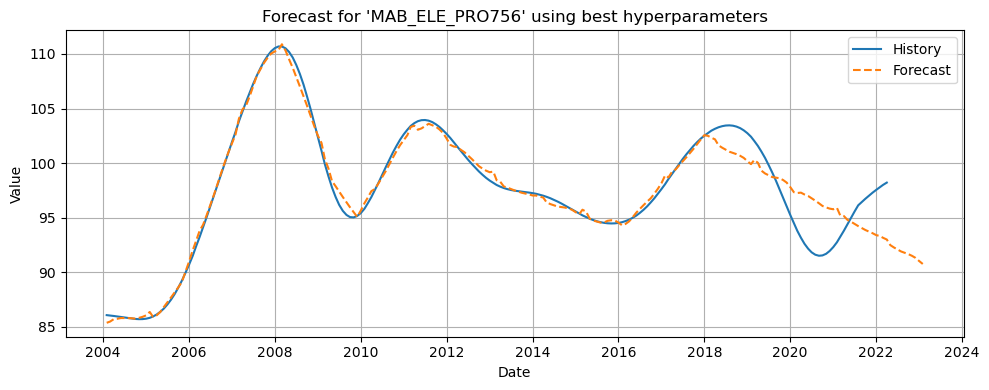

22:50:09 - cmdstanpy - INFO - Chain [1] start processing
22:50:09 - cmdstanpy - INFO - Chain [1] done processing


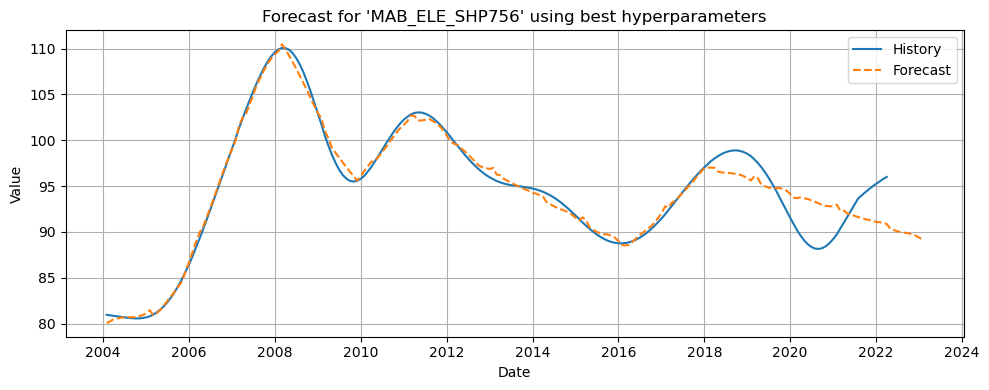

22:50:09 - cmdstanpy - INFO - Chain [1] start processing
22:50:09 - cmdstanpy - INFO - Chain [1] done processing


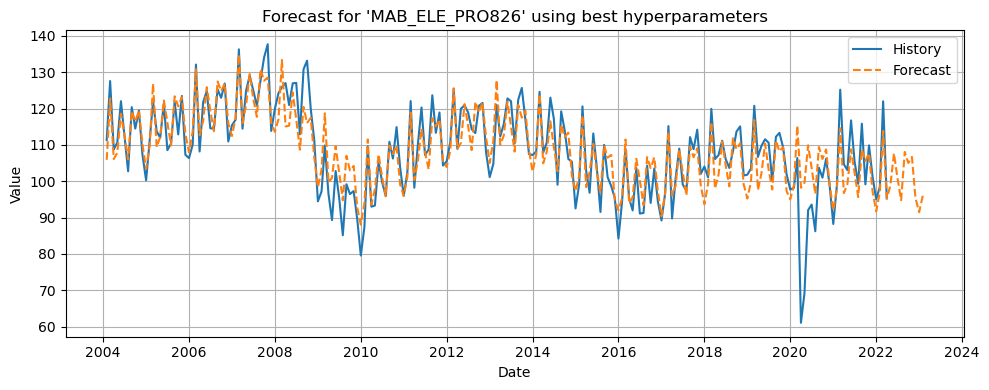

22:50:09 - cmdstanpy - INFO - Chain [1] start processing
22:50:09 - cmdstanpy - INFO - Chain [1] done processing


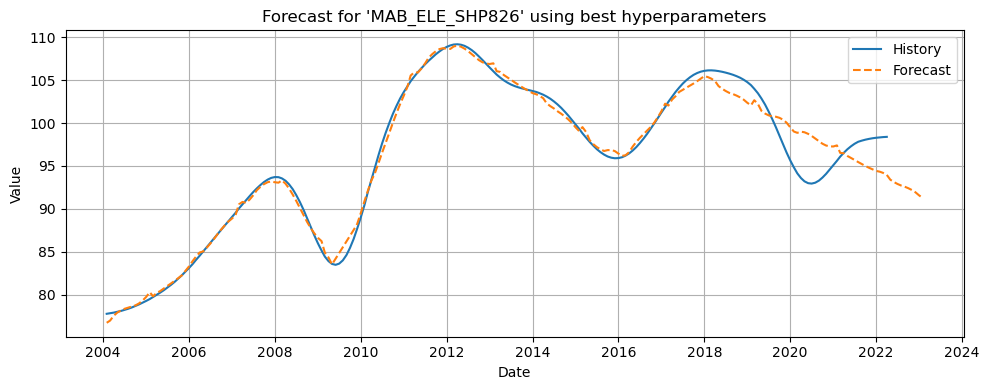

22:50:09 - cmdstanpy - INFO - Chain [1] start processing
22:50:09 - cmdstanpy - INFO - Chain [1] done processing


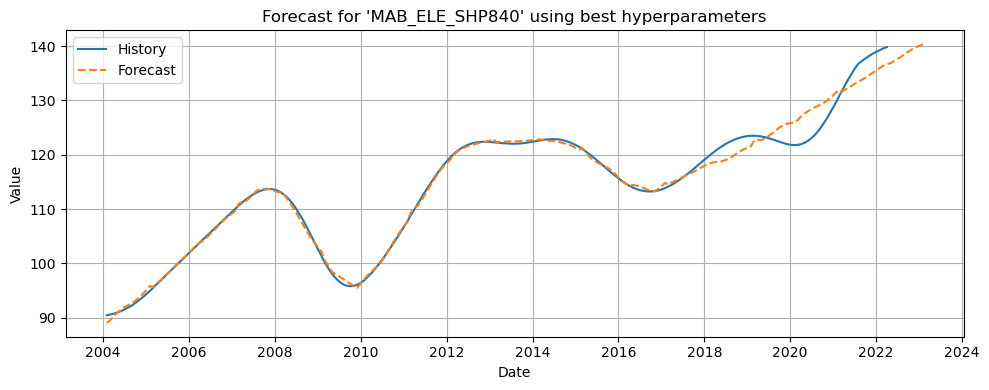

22:50:09 - cmdstanpy - INFO - Chain [1] start processing
22:50:10 - cmdstanpy - INFO - Chain [1] done processing


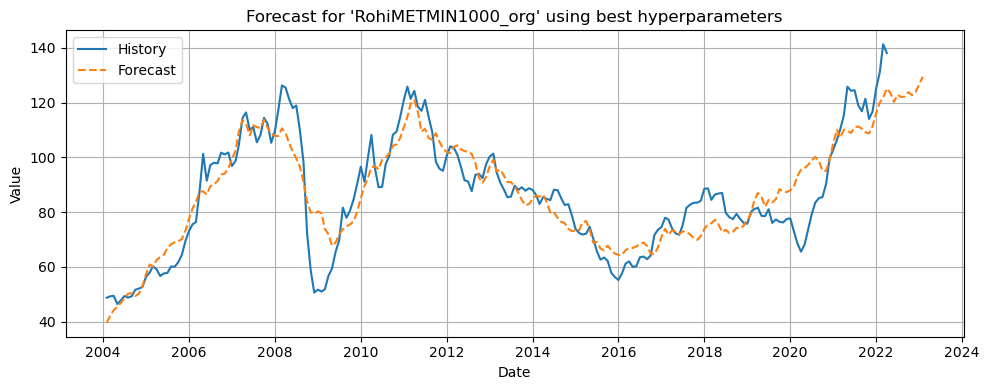

22:50:10 - cmdstanpy - INFO - Chain [1] start processing
22:50:10 - cmdstanpy - INFO - Chain [1] done processing


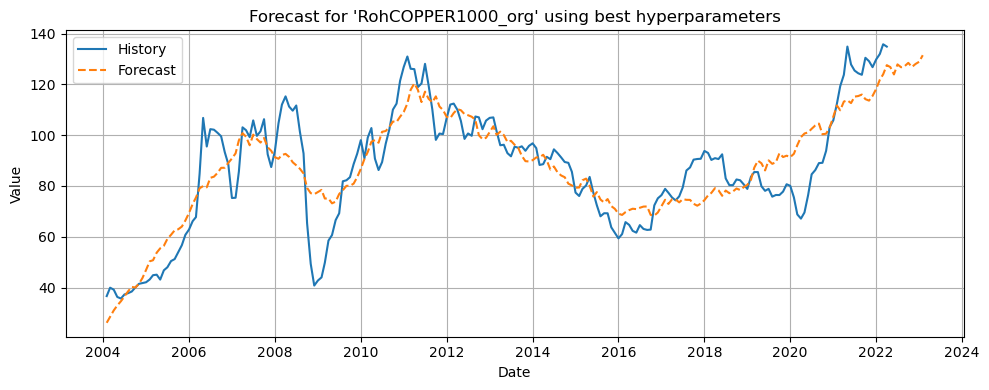

22:50:10 - cmdstanpy - INFO - Chain [1] start processing
22:50:10 - cmdstanpy - INFO - Chain [1] done processing


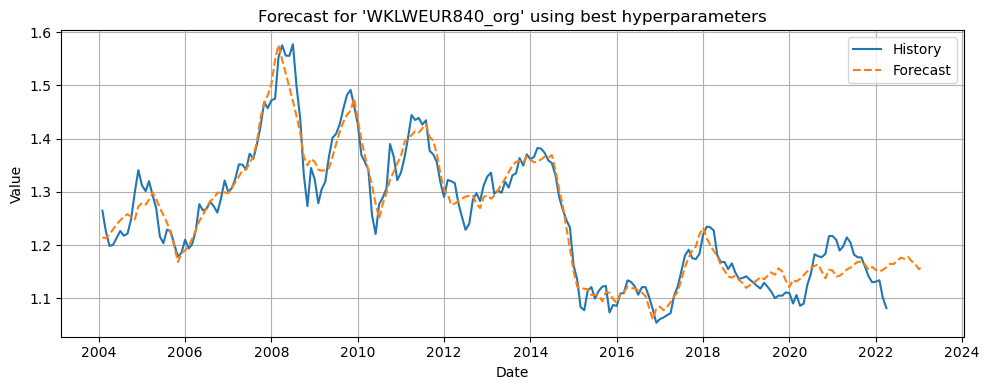

22:50:10 - cmdstanpy - INFO - Chain [1] start processing
22:50:10 - cmdstanpy - INFO - Chain [1] done processing


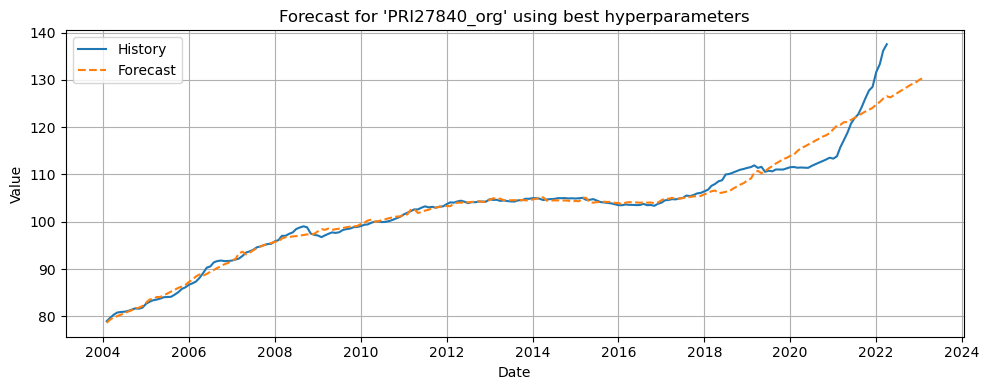

22:50:10 - cmdstanpy - INFO - Chain [1] start processing
22:50:10 - cmdstanpy - INFO - Chain [1] done processing


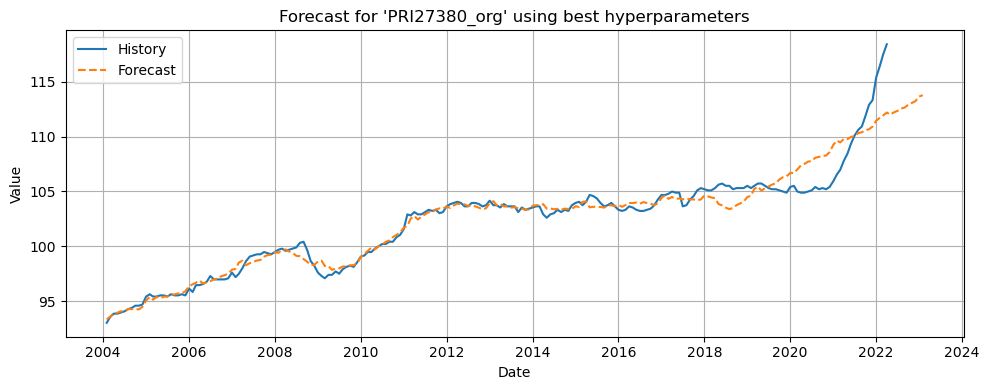

22:50:10 - cmdstanpy - INFO - Chain [1] start processing
22:50:10 - cmdstanpy - INFO - Chain [1] done processing


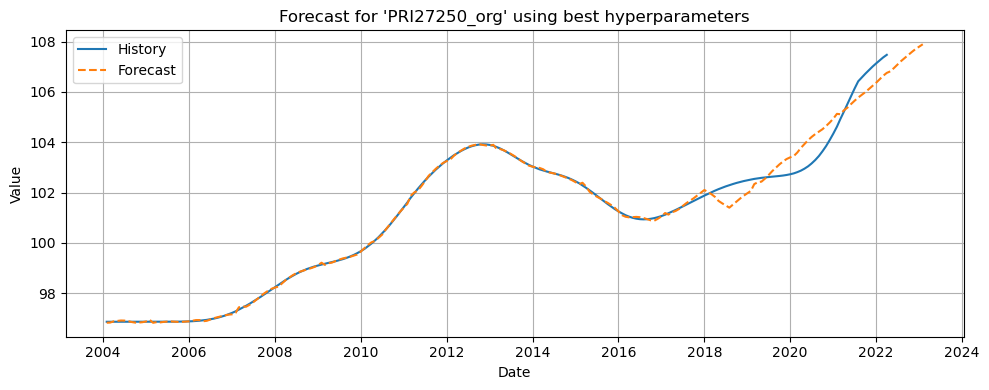

22:50:11 - cmdstanpy - INFO - Chain [1] start processing
22:50:11 - cmdstanpy - INFO - Chain [1] done processing


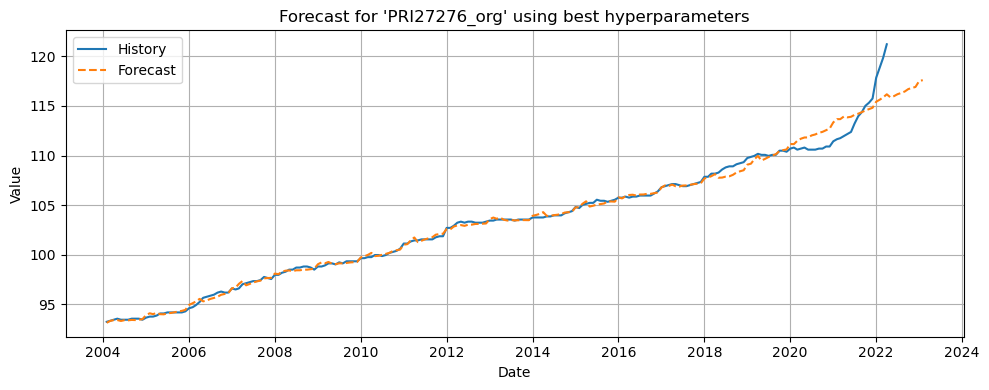

22:50:11 - cmdstanpy - INFO - Chain [1] start processing
22:50:11 - cmdstanpy - INFO - Chain [1] done processing


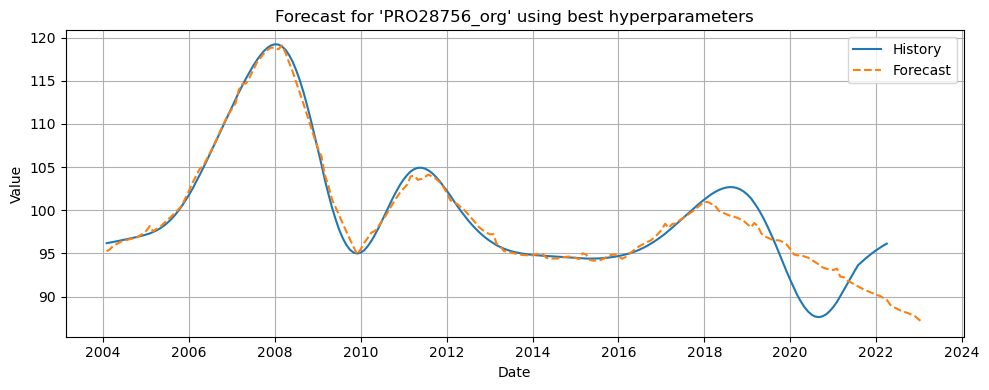

22:50:11 - cmdstanpy - INFO - Chain [1] start processing
22:50:11 - cmdstanpy - INFO - Chain [1] done processing


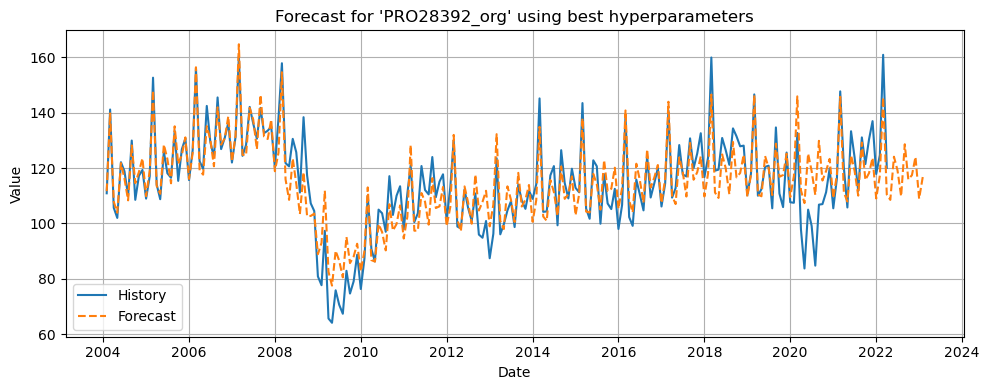

22:50:11 - cmdstanpy - INFO - Chain [1] start processing
22:50:11 - cmdstanpy - INFO - Chain [1] done processing


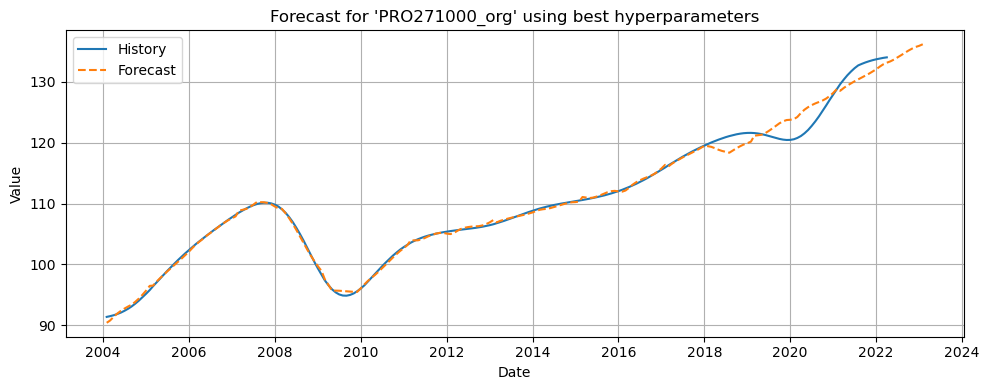

22:50:11 - cmdstanpy - INFO - Chain [1] start processing
22:50:11 - cmdstanpy - INFO - Chain [1] done processing


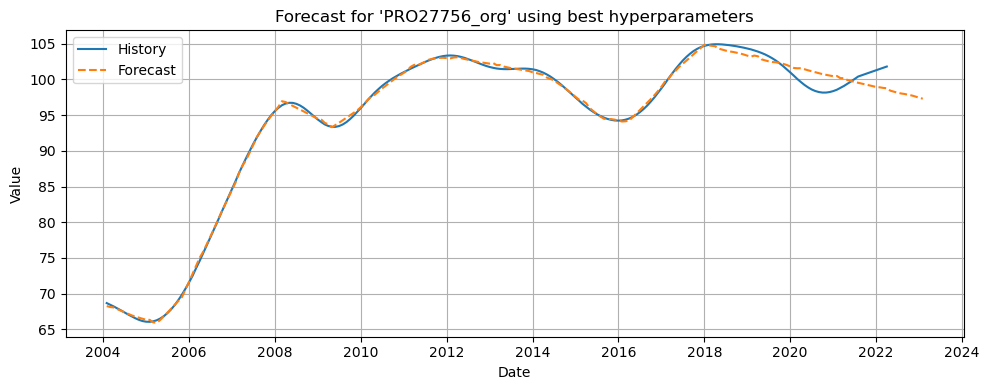

22:50:12 - cmdstanpy - INFO - Chain [1] start processing
22:50:12 - cmdstanpy - INFO - Chain [1] done processing


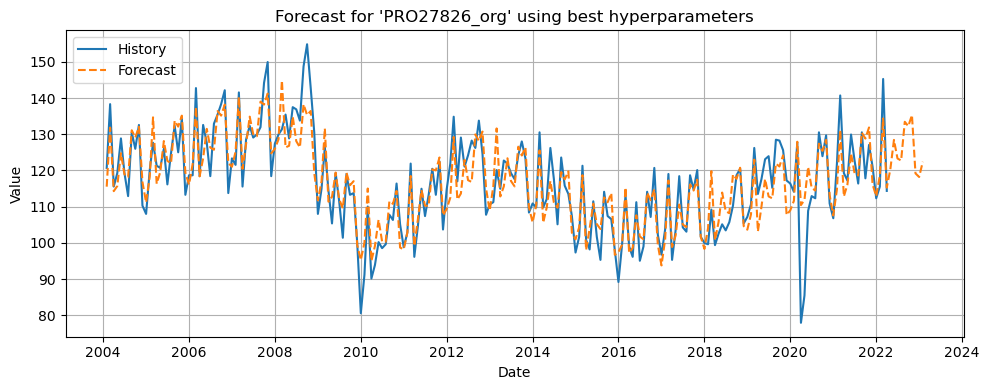

22:50:12 - cmdstanpy - INFO - Chain [1] start processing
22:50:12 - cmdstanpy - INFO - Chain [1] done processing


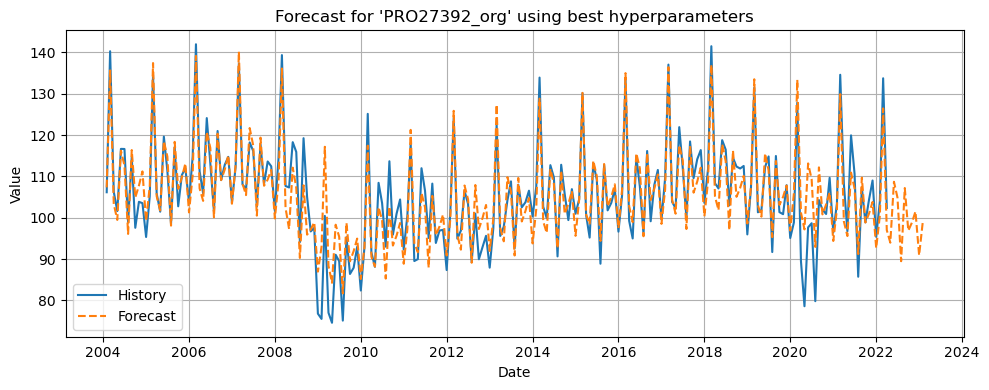

22:50:12 - cmdstanpy - INFO - Chain [1] start processing
22:50:12 - cmdstanpy - INFO - Chain [1] done processing


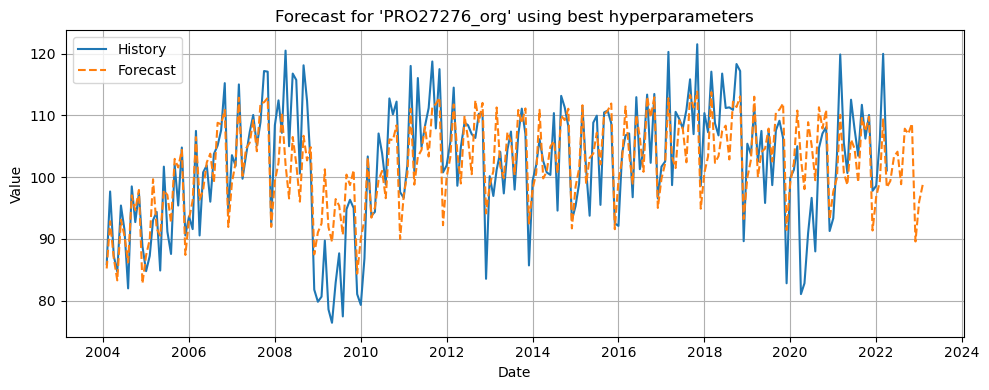

In [7]:
forecasts = specific_single_forecast_market_features_prophet(
    df_market, 
    best_params_dict=grid_search_results, 
    date_column='date', 
    forecast_horizon=10, 
    plot=True
)

We dicided to use the model that incorporate the covid and ukrain war, as we thought it better fitted the trend of the data (though we still acknowledge some weird resulst). future itaration must incorporate better prediction method. 

In [10]:
extended_df = append_forecasts_to_market_df(df_market, forecasts_with_covide_ukraine, date_column='date')
extended_df.tail(15)

date  MAB_ELE_PRO156  MAB_ELE_SHP156  MAB_ELE_SHP250  \
214 2021-12-01      310.763183      310.763183      134.589504   
215 2022-01-01      235.956129      235.956129      108.156320   
216 2022-02-01      235.956129      235.956129      117.715770   
217 2022-03-01      329.413367      329.413367      136.858720   
218 2022-04-01      267.373145      267.373145      116.528738   
219 2022-05-01      296.945215      296.945215      108.536189   
220 2022-06-01      303.570777      303.570777      153.555896   
221 2022-07-01      258.660564      258.660564      130.248939   
222 2022-08-01      252.707831      252.707831      109.101880   
223 2022-09-01      265.006861      265.006861      147.206286   
224 2022-10-01      271.210628      271.210628      149.009213   
225 2022-11-01      286.384458      286.384458      139.348203   
226 2022-12-01      313.463552      313.463552      151.463143   
227 2023-01-01      205.639441      205.639441      131.400356   
228 2023-02-01      205.354688      205.354688      134.497386   

     MAB_ELE_PRO392  MAB_ELE_SHP392  MAB_ELE_PRO756  MAB_ELE_SHP756  \
214      127.771735      131.029703       97.290609       94.963776   
215      110.460181      110.823532       97.547117       95.252047   
216      117.879631      118.300232       97.787182       95.521098   
217      152.000561      156.400634       98.009615       95.769697   
218      114.262328      115.012049       98.213559       95.997003   
219      104.100560      103.061599       94.256389       92.347011   
220      132.842671      132.500873      100.379117       99.041229   
221      128.078985      128.044089      100.345542       99.076954   
222      115.486897      117.557351      100.311706       99.132952   
223      136.268320      140.180231      100.347200       99.245515   
224      123.247752      121.647577      100.374640       99.339645   
225      125.340852      124.884550      100.366502       99.407691   
226      131.399965      133.572223      100.313847       99.414633   
227      116.349340      115.364731      100.153649       99.322295   
228      125.473782      126.772802      100.033240       99.289973   

     MAB_ELE_PRO826  MAB_ELE_SHP826  ...  PRI27380_org  PRI27250_org  \
214      101.273544       98.233705  ...    113.309631    107.006989   
215       95.003541       98.291641  ...    115.390617    107.136619   
216       98.458412       98.336496  ...    116.431107    107.258155   
217      121.993915       98.370613  ...    117.471596    107.371066   
218       95.266502       98.396144  ...    118.408043    107.474967   
219      102.813857       95.265382  ...    113.627809    107.153642   
220      131.218232      100.502624  ...    118.524122    108.344840   
221      124.809267      100.426998  ...    118.779549    108.506947   
222      119.217863      100.389805  ...    119.121011    108.675776   
223      132.921468      100.391037  ...    119.335092    108.821214   
224      130.271396      100.351865  ...    119.709578    108.963381   
225      132.291539      100.274779  ...    119.980955    109.107937   
226      121.245595      100.148567  ...    120.254846    109.240924   
227      117.700769       99.929768  ...    120.787554    109.361732   
228      122.588569       99.805079  ...    121.057320    109.492243   

     PRI27276_org  PRO28756_org  PRO28392_org  PRO271000_org  PRO27756_org  \
214    115.748863     95.056728    136.975506     133.527660    101.137242   
215    117.853386     95.359690    117.861377     133.675526    101.313760   
216    118.905647     95.638921    124.710859     133.801232    101.486382   
217    119.852684     95.893397    160.954233     133.906950    101.653638   
218    121.220627     96.122675    120.098810     133.994879    101.813956   
219    116.886737     90.911611    108.568114     133.639890     99.889695   
220    120.333442     98.137266    139.786123     134.950348    103.950092   
221    120.612382     98.090917    134.

<hr>
<a class="anchor" id="export">

## 3. Export
</a>

In [11]:
extended_df.to_csv('../Data/Market_data_predicted.csv', index=False)